## CP2 - Healthcare - Diabetic Prediction

In [169]:
## Load the required libraries to import the data and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
## Load the data
df = pd.read_csv(r"C:\Users\Shweta\Downloads\health care diabetes.csv")

In [171]:
## Displaying some sample data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [172]:
## Displaying the variables statistical details
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [173]:
## Checking the missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [174]:
## Updating the zero value columns with np.nan so that those data can be treated for missing values
df.loc[df.BMI == 0, 'BMI'] = np.nan
df.loc[df.Glucose == 0, 'Glucose'] = np.nan
df.loc[df.BloodPressure == 0, 'BloodPressure'] = np.nan
df.loc[df.SkinThickness == 0, 'SkinThickness'] = np.nan
df.loc[df.Insulin == 0, 'Insulin'] = np.nan

In [175]:
## Checking the missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [176]:
df[df.BMI.isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [177]:
df.shape

(768, 9)

In [178]:
BMI_mv_idx = df[df.BMI.isnull()].index.tolist()

In [179]:
BMI_mv_idx

[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]

In [180]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [181]:
df1 = df.copy(deep = True)

In [182]:
iter_imp = IterativeImputer(random_state = 1)

In [183]:
iter_imp.fit(df)

IterativeImputer(random_state=1)

In [184]:
iter_imputed_values = iter_imp.transform(df)

In [185]:
df_new = pd.DataFrame(iter_imputed_values, columns = df.columns)

In [186]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [187]:
df_new.loc[BMI_mv_idx]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8.0,125.0,96.000000,34.062564,161.554785,35.832462,0.232,54.0,1.0
49,7.0,105.0,68.917582,26.861786,109.574782,31.155363,0.305,24.0,0.0
60,2.0,84.0,66.390138,25.355417,67.130469,30.561569,0.304,21.0,0.0
81,2.0,74.0,66.048370,24.691901,45.453535,29.941294,0.102,22.0,0.0
145,0.0,102.0,75.000000,23.000000,102.153014,30.611504,0.572,21.0,0.0
371,0.0,118.0,64.000000,23.000000,89.000000,29.916297,1.731,21.0,0.0
426,0.0,94.0,67.731925,25.832977,91.558447,30.703616,0.256,25.0,0.0
494,3.0,80.0,66.517226,25.133025,57.773129,30.229478,0.174,22.0,0.0
522,6.0,114.0,69.756035,27.186237,130.266239,31.255018,0.189,26.0,0.0
684,5.0,136.0,82.000000,30.758855,193.852457,30.890640,0.640,69.0,0.0


In [188]:
df_new.shape

(768, 9)

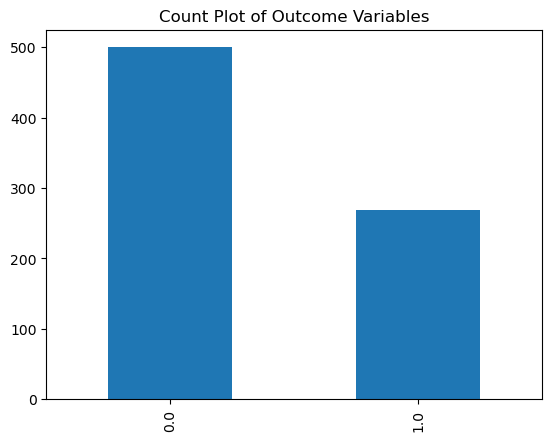

In [189]:
df_new.Outcome.value_counts().plot(kind='bar')
plt.title("Count Plot of Outcome Variables")
plt.show()

In [190]:
df_new.Outcome.value_counts(normalize=True).mul(100).round(2)

0.0    65.1
1.0    34.9
Name: Outcome, dtype: float64

In [191]:
X = df_new.iloc[:, :-1]
y = df_new.iloc[:,-1]

In [192]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [193]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [194]:
X.shape, y.shape

((768, 8), (768,))

In [195]:
from imblearn.over_sampling import SMOTE 

# transform the dataset oversample = SMOTE() 
X, y = SMOTE().fit_resample(X, y) 

In [196]:
X.shape, y.shape

((1000, 8), (1000,))

In [197]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [198]:
X.shape

(1000, 8)

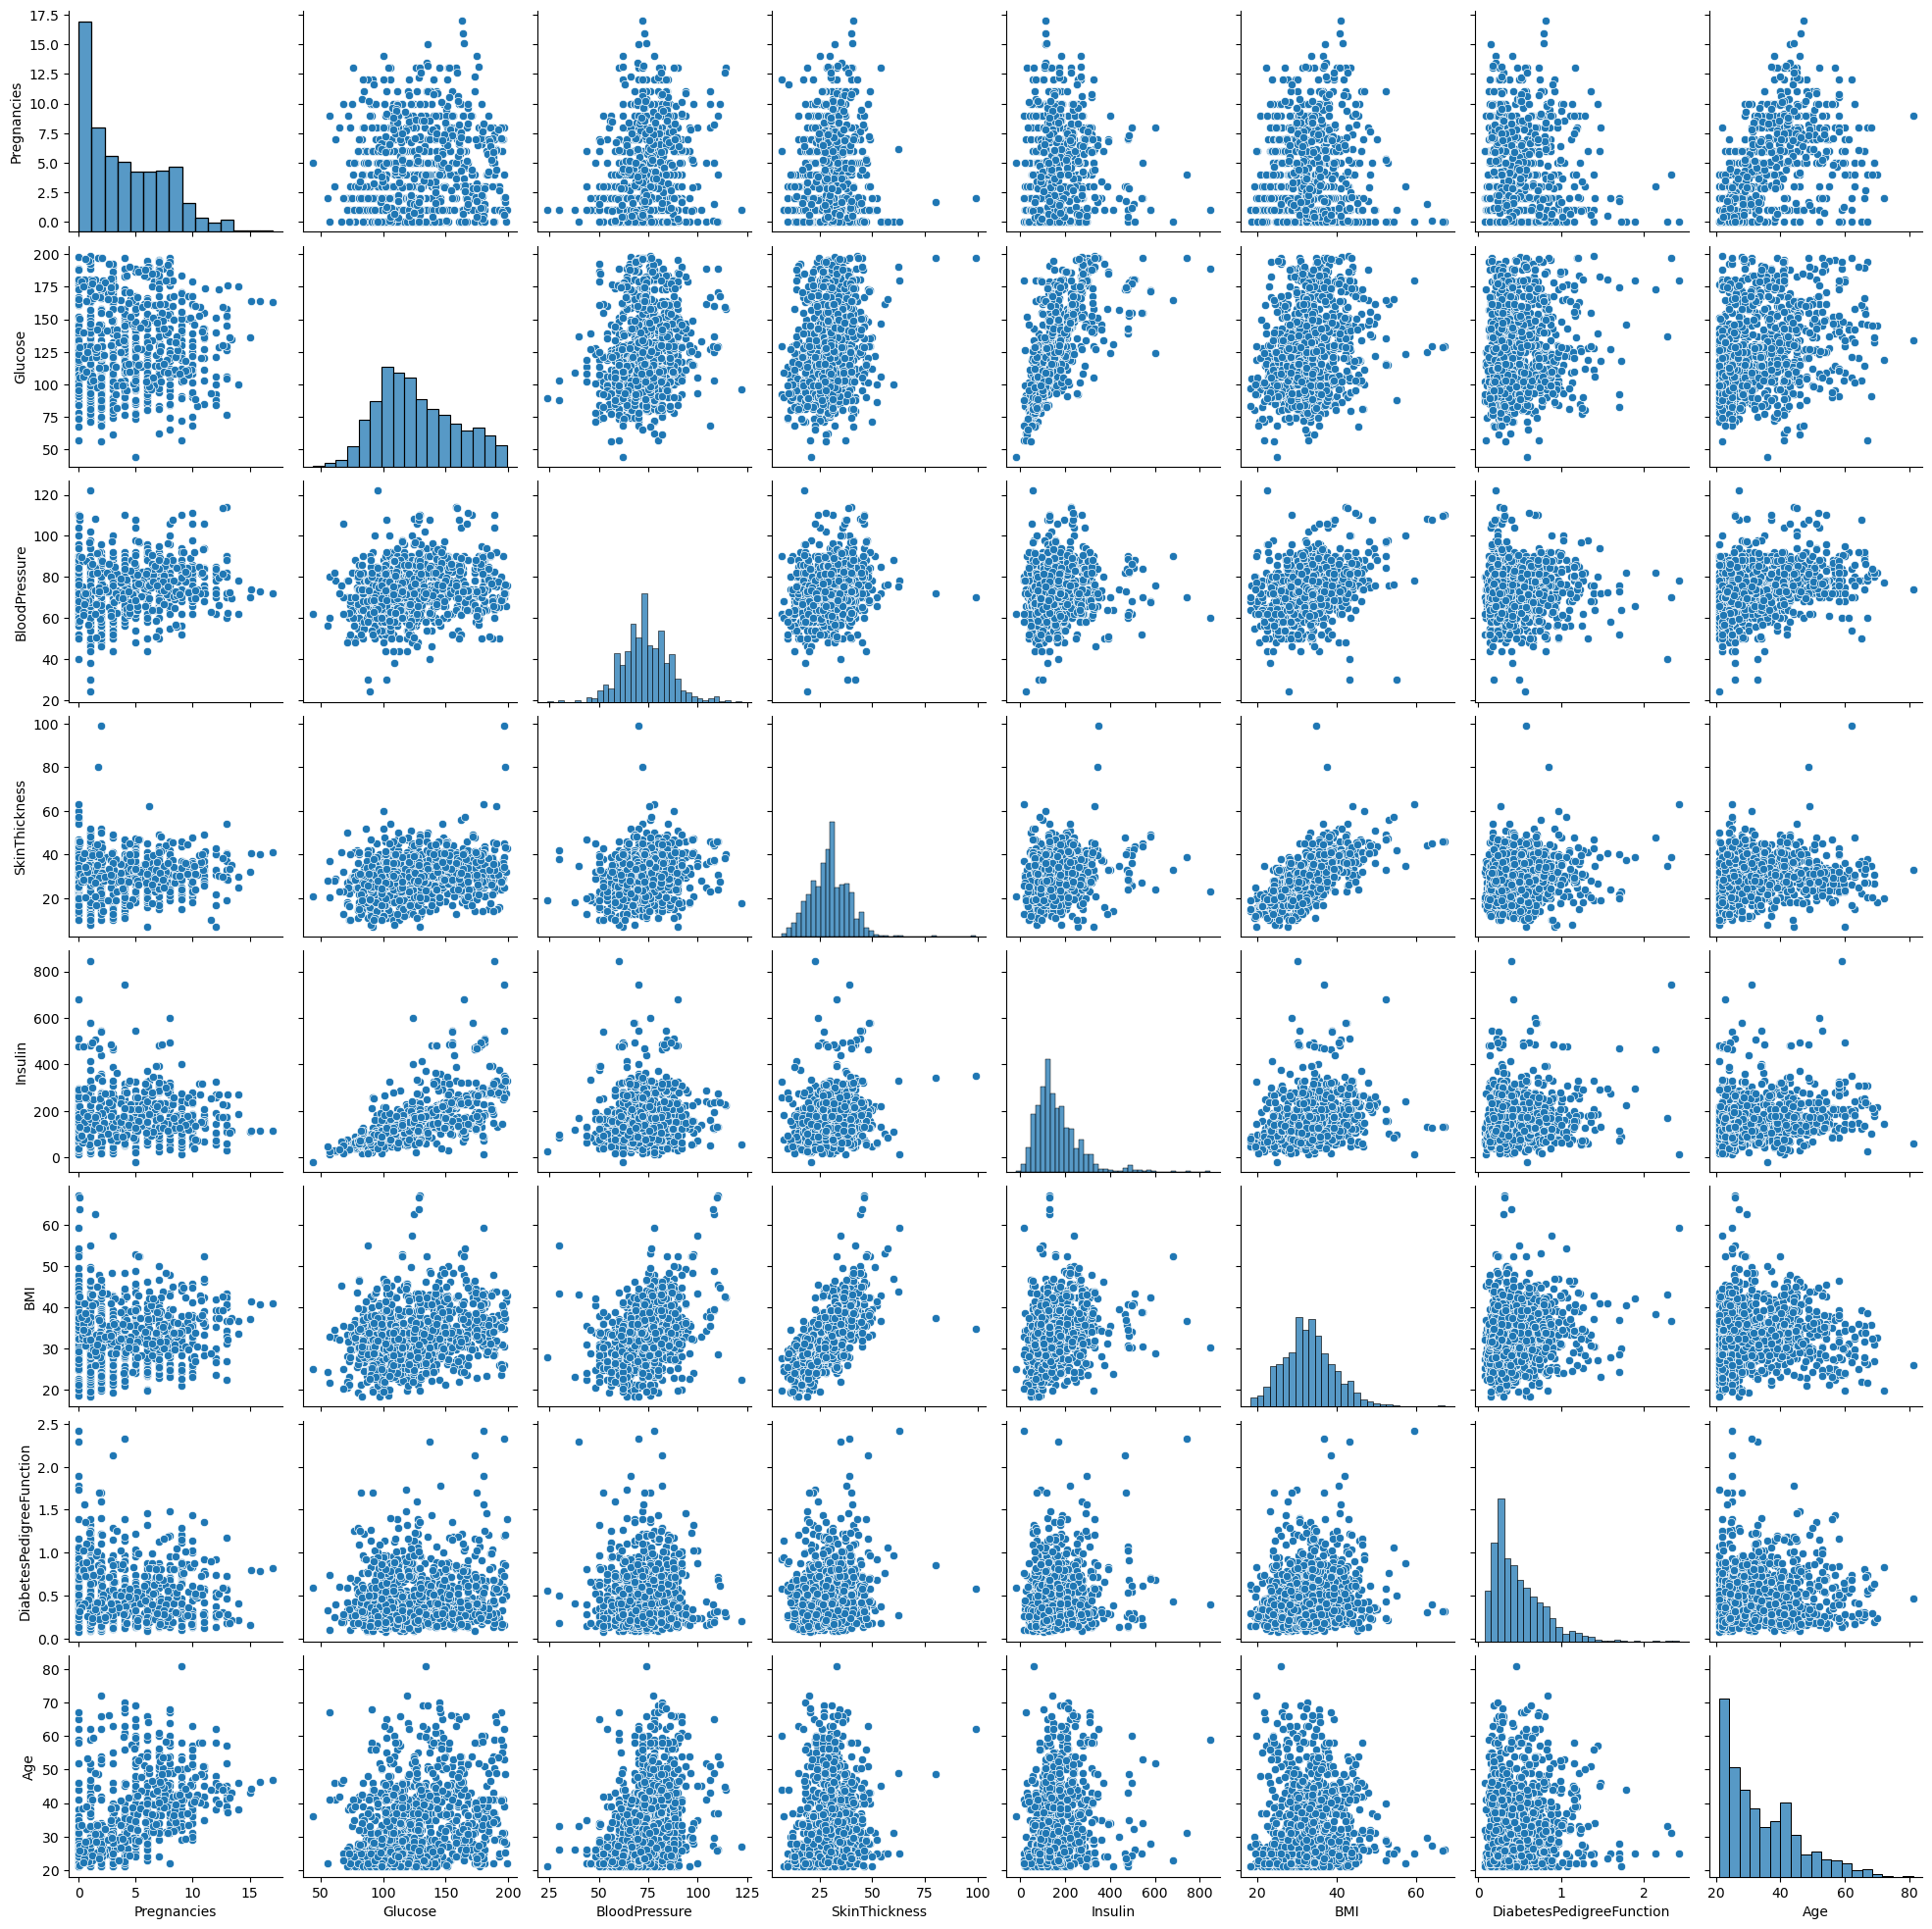

In [199]:
sns.pairplot(X)
plt.show()

In [200]:
corr = X.corr()

<Axes: >

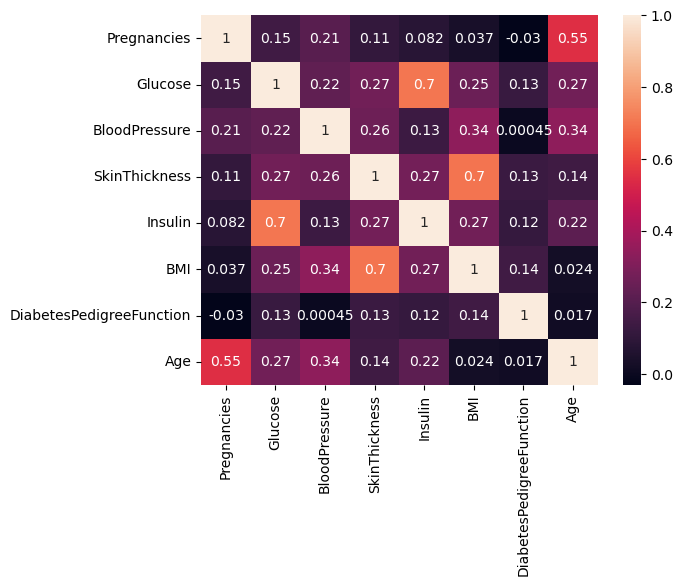

In [201]:
sns.heatmap(corr, annot=True)

## Let us build our first model

In [202]:
X.shape, y.shape

((1000, 8), (1000,))

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [205]:
lr_model = LogisticRegression()

In [206]:
lr_model.fit(X_train, y_train)

C:\Users\Shweta\Documents\Anaconda New\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [207]:
dt_model = DecisionTreeClassifier()

In [208]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [209]:
dt_pred = dt_model.predict(X_test)

## Let us evaluate the model

In [210]:
from sklearn.metrics import classification_report, confusion_matrix

In [211]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75        98
         1.0       0.75      0.84      0.79       102

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [212]:
print(confusion_matrix(y_test, dt_pred))

[[69 29]
 [16 86]]


In [213]:
y_test.value_counts()

1.0    102
0.0     98
Name: Outcome, dtype: int64

## Checking Multi-colinearity

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                    feature        VIF
0               Pregnancies   3.560689
1                   Glucose  31.444124
2             BloodPressure  38.985574
3             SkinThickness  23.206260
4                   Insulin   7.252447
5                       BMI  48.436049
6  DiabetesPedigreeFunction   3.383782
7                       Age  16.157308


In [215]:
X1 = X.drop('BMI', axis=1)

<Axes: >

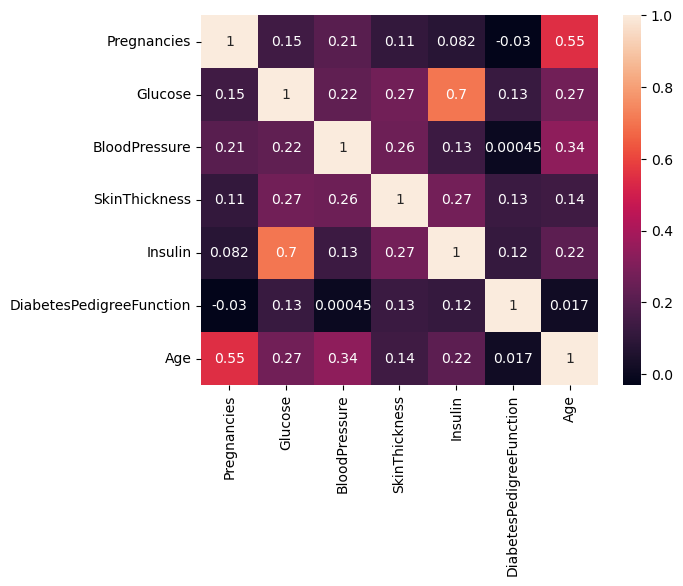

In [216]:
sns.heatmap(X1.corr(), annot=True)

## Building the model without colinearity

In [217]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = .20, random_state=123)

In [218]:
dt_model.fit(X1_train, y_train)

DecisionTreeClassifier()

In [219]:
x1_pred = dt_model.predict(X1_test)

In [220]:
print(classification_report(y_test, x1_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.60      0.67        98
         1.0       0.68      0.81      0.74       102

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [221]:
print(confusion_matrix(x1_pred, y_test))

[[59 19]
 [39 83]]


In [222]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [223]:
rf_model.fit(X1_train, y_train)

RandomForestClassifier()

In [224]:
rf_pred = rf_model.predict(X1_test)

In [225]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80        98
         1.0       0.77      0.93      0.84       102

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.82      0.82       200



In [226]:
print(confusion_matrix(rf_pred, y_test))

[[70  7]
 [28 95]]


<Axes: >

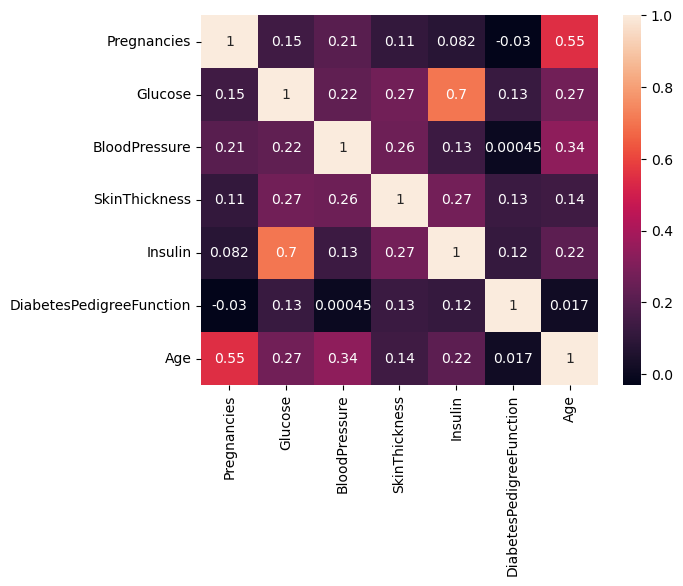

In [249]:
sns.heatmap(X1.corr(), annot=True)

## Building the model without resampling (using original data)

In [227]:
df_new.shape

(768, 9)

In [228]:
X = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

In [229]:
X.shape, y.shape

((768, 8), (768,))

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 12)

In [231]:
X_train.shape

(614, 8)

In [232]:
X_test.shape

(154, 8)

In [233]:
y_train.value_counts(normalize=True).mul(100).round(2)

0.0    65.31
1.0    34.69
Name: Outcome, dtype: float64

In [234]:
y_test.value_counts(normalize=True).mul(100).round(2)

0.0    64.29
1.0    35.71
Name: Outcome, dtype: float64

In [235]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [236]:
rf2_pred = rf_model.predict(X_test)

In [237]:
print(classification_report(y_test, rf2_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        99
         1.0       0.79      0.62      0.69        55

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



In [238]:
zip(X.columns, rf_model.feature_importances_)

In [239]:
for x in zip(X.columns, rf_model.feature_importances_ * 100):
    print(x)

('Pregnancies', 7.433553492554382)
('Glucose', 20.373273961855357)
('BloodPressure', 7.617148049609098)
('SkinThickness', 9.741660748727671)
('Insulin', 17.831295013411097)
('BMI', 13.962313955457976)
('DiabetesPedigreeFunction', 11.437903721645705)
('Age', 11.602851056738723)


## Building the model with KNNClassifier


In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
knn = KNeighborsClassifier()

In [242]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [243]:
knn_pred = knn.predict(X_test)

In [244]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        99
         1.0       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### AUC and ROC Curve

In [245]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [246]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

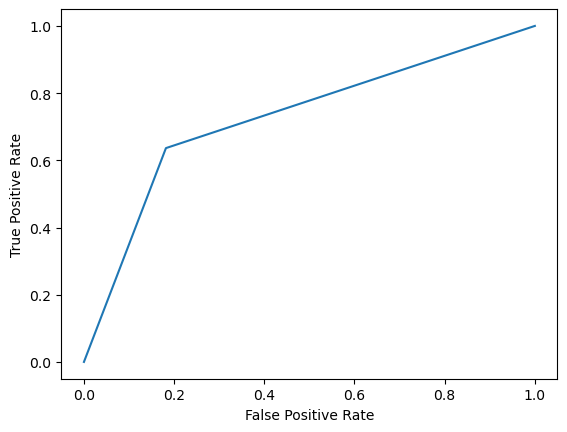

In [247]:
plot_roc_curve(y_test, knn_pred)

In [248]:
print("KNN Model Accuracy_score : {}%".format(round(accuracy_score(y_test, knn_pred)*100,2)))

KNN Model Accuracy_score : 75.32%
